In [190]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score
from sklearn.svm import SVC
from sklearn import svm
warnings.filterwarnings('ignore')

**Load Dataset**

In [191]:
data = pd.read_csv(r'C:\Users\Dell\Desktop\HeartStrokePrediction\healthcare-dataset-stroke-data.csv')

In [192]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [194]:
# check missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [195]:
# handling null values
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [196]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [197]:
#convert all columns has type  object to category
convert_columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

for column in convert_columns:
    data[column] = data[column].astype('category')

In [198]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


In [141]:
# check duplicated rows
data[data.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [142]:
data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

**Data visualization**

<Axes: xlabel='stroke', ylabel='age'>

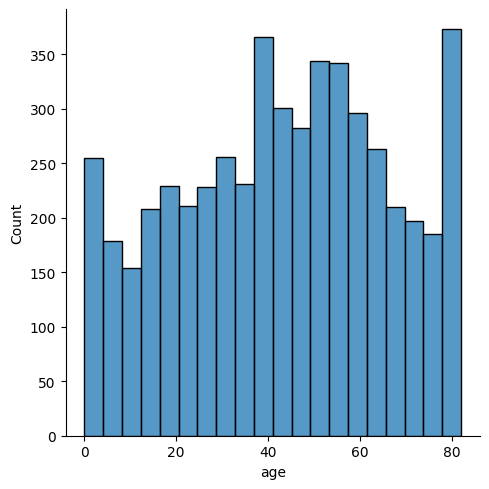

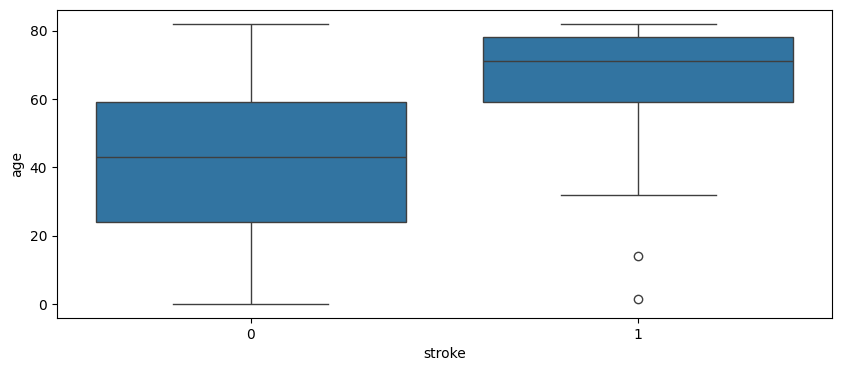

In [143]:
data['age'].nunique()
# Returns number of unique values in this attribute
sns.displot(data['age'])
# This will plot a distribution plot of variable age
plt.figure(figsize=(10,4))
sns.boxplot(data=data,x='stroke',y='age')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

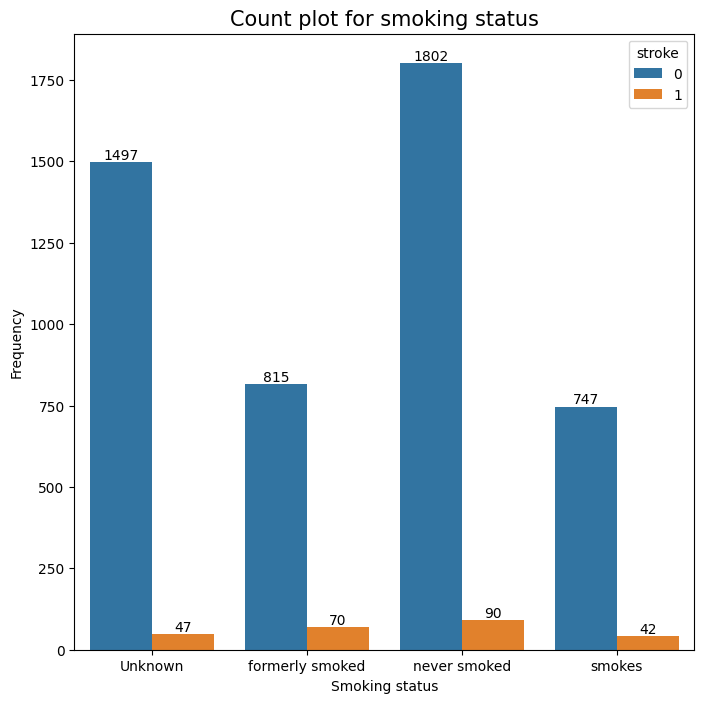

In [144]:
# Create the count or bar plot
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='smoking_status', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Smoking status')
plt.ylabel('Frequency')
plt.title('Count plot for smoking status', fontsize=15)
# Show the plot
plt.show()

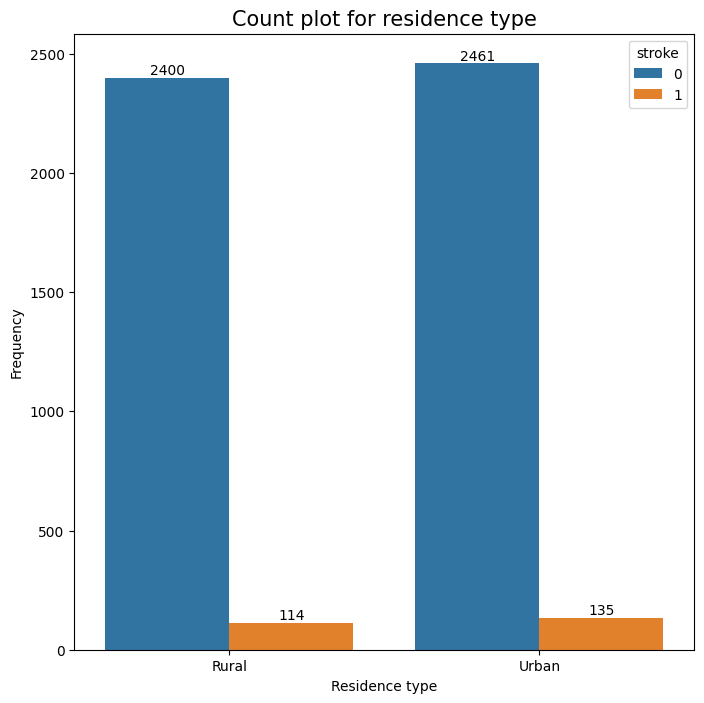

In [145]:
# Create the count or bar plot
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Residence_type', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Residence type')
plt.ylabel('Frequency')
plt.title('Count plot for residence type', fontsize=15)
# Show the plot
plt.show()

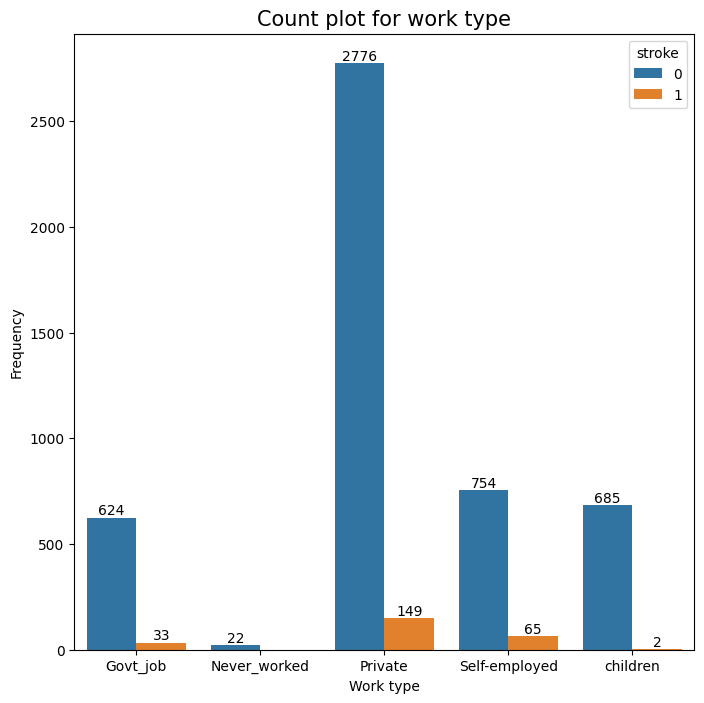

In [146]:
# Create the count or bar plot
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='work_type', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Work type')
plt.ylabel('Frequency')
plt.title('Count plot for work type', fontsize=15)
# Show the plot
plt.show()

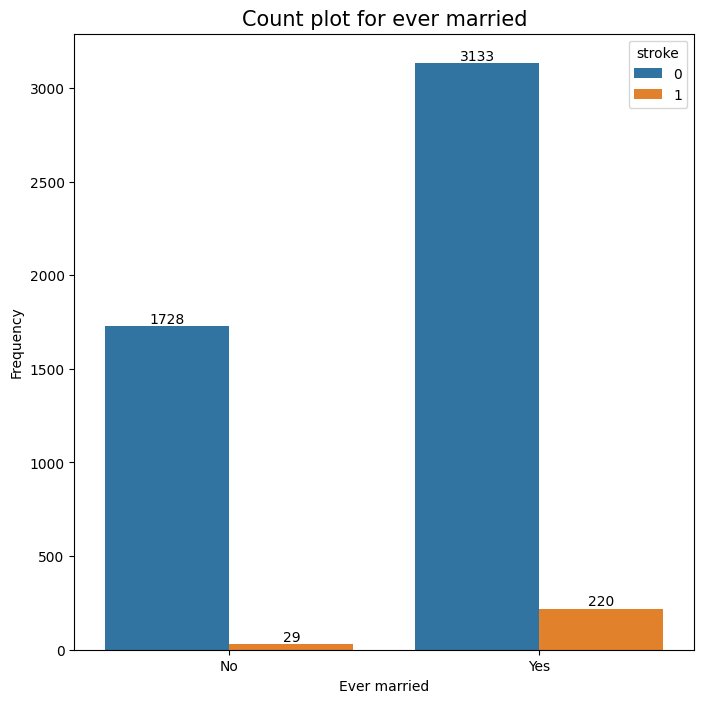

In [147]:
# Create the count or bar plot
plt.figure(figsize=(8,8))
ax = sns.countplot(x='ever_married', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Ever married')
plt.ylabel('Frequency')
plt.title('Count plot for ever married', fontsize=15)
# Show the plot
plt.show()

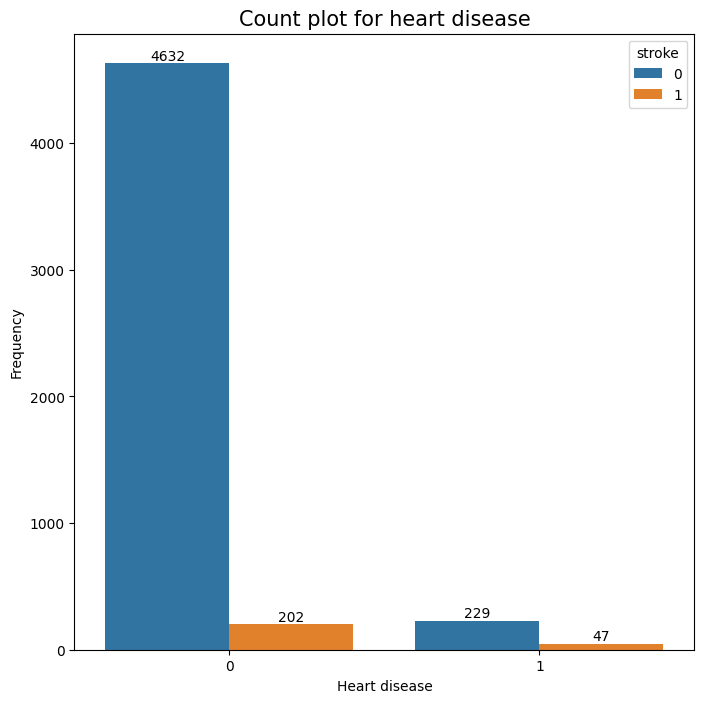

In [148]:
# Create the count or bar plot
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='heart_disease', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Heart disease')
plt.ylabel('Frequency')
plt.title('Count plot for heart disease', fontsize=15)
# Show the plot
plt.show()

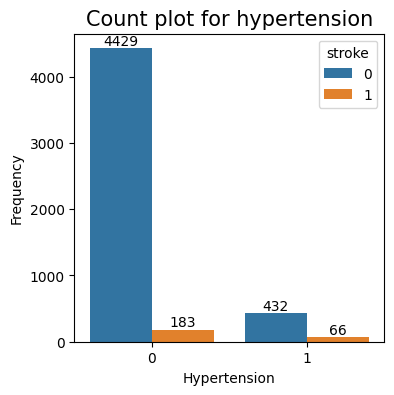

In [149]:
# Create the count or bar plot
plt.figure(figsize=(4, 4))
ax = sns.countplot(x='hypertension', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Hypertension')
plt.ylabel('Frequency')
plt.title('Count plot for hypertension', fontsize=15)
# Show the plot
plt.show()

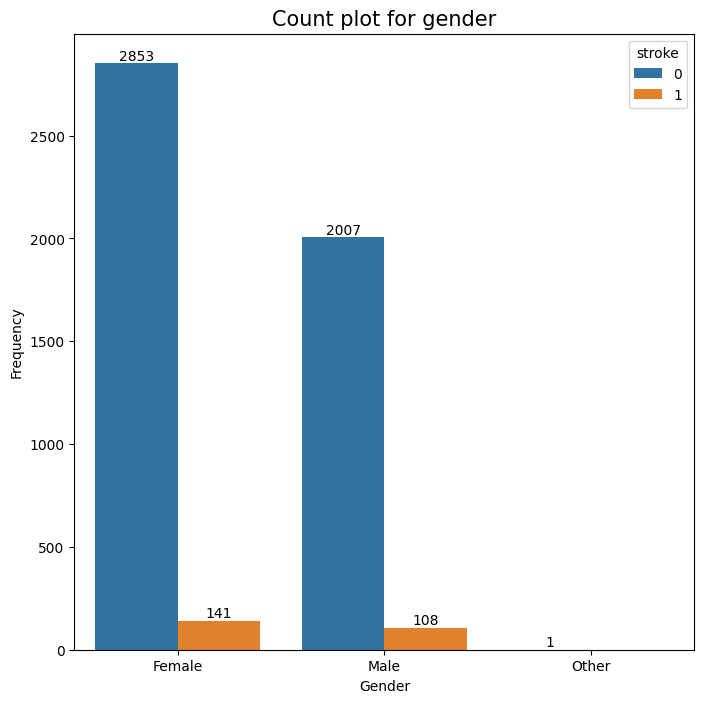

In [150]:
# Create the count or bar plot
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='gender', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Count plot for gender', fontsize=15)
# Show the plot
plt.show()

**Preprocessing**

In [199]:
data=data.drop(['id'],axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [200]:
data.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.698018
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


In [201]:
data['stroke'].value_counts().to_frame()

,count
stroke,
0,4861
1,249


In [202]:
stroke_majority=data[data['stroke']==0]
stroke_minority=data[data['stroke']==1]

In [203]:
stroke_minority_oversample=resample(stroke_minority,n_samples=4861,replace=True,random_state=42)

In [204]:
stroke_df=pd.concat([stroke_minority_oversample,stroke_majority])

In [205]:
stroke_df['stroke'].value_counts().to_frame()

,count
stroke,
0,4861
1,4861


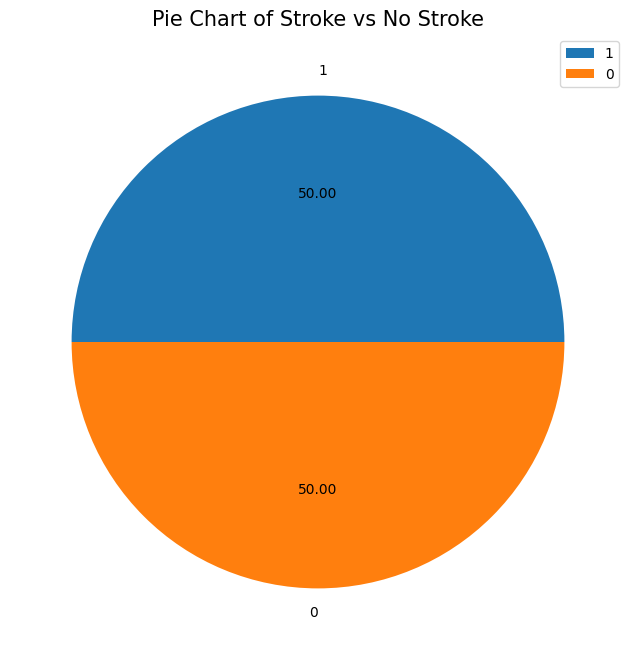

In [158]:
has_stroke = stroke_df.loc[data['stroke']==1,'stroke'].count()
no_stroke = stroke_df.loc[data['stroke']==0,'stroke'].count()
label=['1','0']
fig = plt.figure(figsize = (12,8))
patches = plt.pie([has_stroke,no_stroke], labels=label,autopct='%.2f')
plt.legend(label)
plt.title('Pie Chart of Stroke vs No Stroke', fontsize=15)
plt.show()

Text(0.5, 0.98, 'Features Distribution')

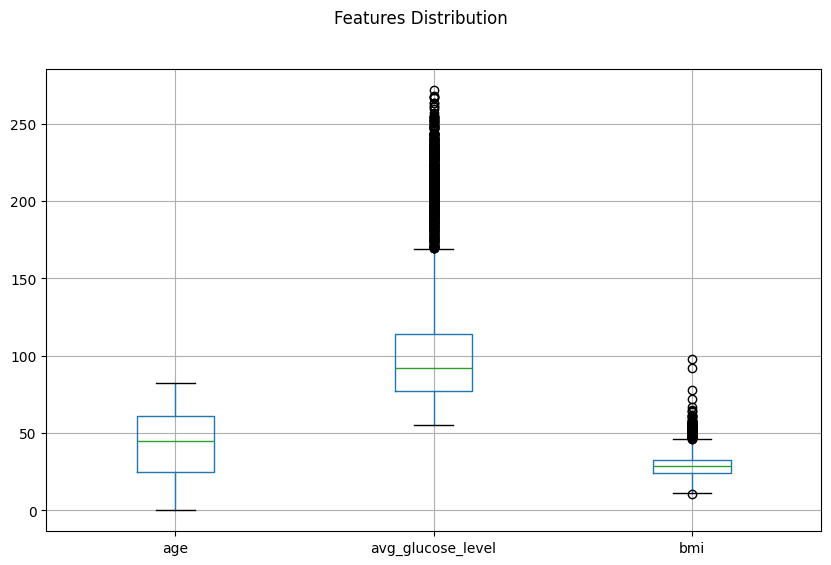

In [159]:
# check outliers
data_boxplot = data.boxplot(figsize = (10,6))
plt.suptitle('Features Distribution')

In [206]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [161]:
# Handling outliers
data['avg_glucose_level'].max()

271.74

In [162]:
print("Outliers: ", data[(data['avg_glucose_level']>= 210)].count())

Outliers:  gender               315
age                  315
hypertension         315
heart_disease        315
ever_married         315
work_type            315
Residence_type       315
avg_glucose_level    315
bmi                  315
smoking_status       315
stroke               315
dtype: int64


In [163]:
data = data[(data['avg_glucose_level']<= 210)]

In [164]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [165]:
print("Outliers: ", data[(data['bmi']>= 55)].count())

Outliers:  gender               28
age                  28
hypertension         28
heart_disease        28
ever_married         28
work_type            28
Residence_type       28
avg_glucose_level    28
bmi                  28
smoking_status       28
stroke               28
dtype: int64


In [166]:
data = data[(data['bmi']<= 55)]
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Text(0.5, 0.98, 'Features Distribution')

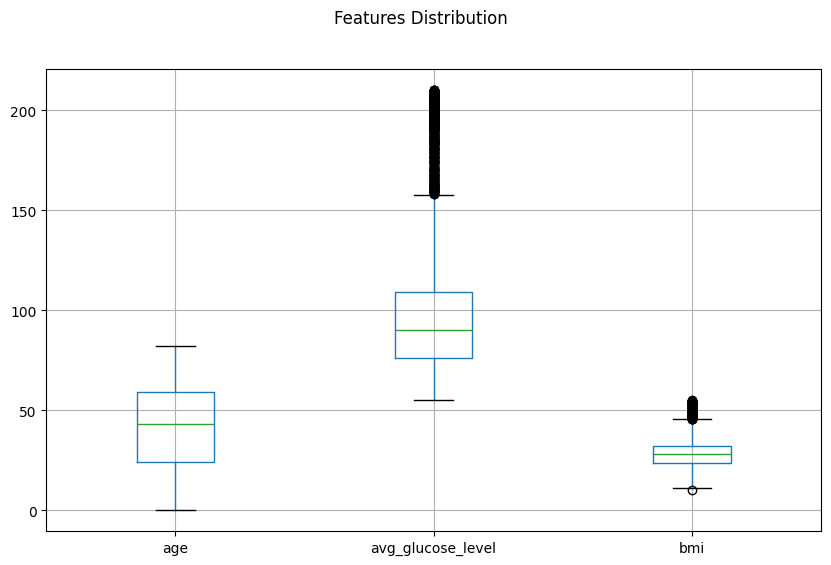

In [167]:
data_boxplot = data.boxplot(figsize= (10,6))
plt.suptitle("Features Distribution")

In [207]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['gender', 'ever_married' , 'work_type' , 'Residence_type' , 'smoking_status' ]
label_encoder = LabelEncoder()
for column in columns_to_encode:
  if column in data:
    data[column] = label_encoder.fit_transform(data[column])

In [208]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


<Axes: >

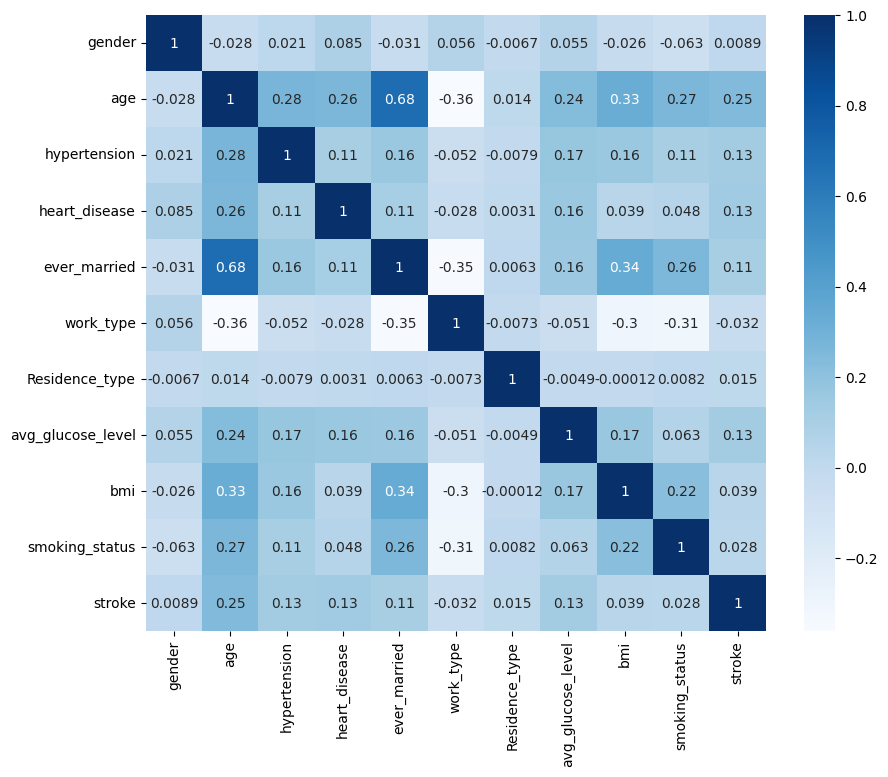

In [209]:
# plotting heatmap for correlation
plt.figure(figsize= (10,8))
sns.heatmap(data.corr(), annot = True, cmap = 'Blues')

In [210]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col_name in data.columns:
    if data[col_name].nunique() > 5:
        data[col_name] = scaler.fit_transform(data[[col_name]])

In [211]:
X = data.drop("stroke",axis=1)
y =data['stroke']

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

SVM

In [213]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [214]:
y_pred_svm = svm.predict(X)
cm = confusion_matrix(y,y_pred_svm)

In [215]:
acc_svm = accuracy_score(y, y_pred_svm)
print("Accuracy: ",acc_svm)
print(classification_report(y, y_pred_svm))

Accuracy:  0.9512720156555773
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       0.00      0.00      0.00       249

    accuracy                           0.95      5110
   macro avg       0.48      0.50      0.49      5110
weighted avg       0.90      0.95      0.93      5110



Text(0.5, 1.0, 'svm Confusion Matrix')

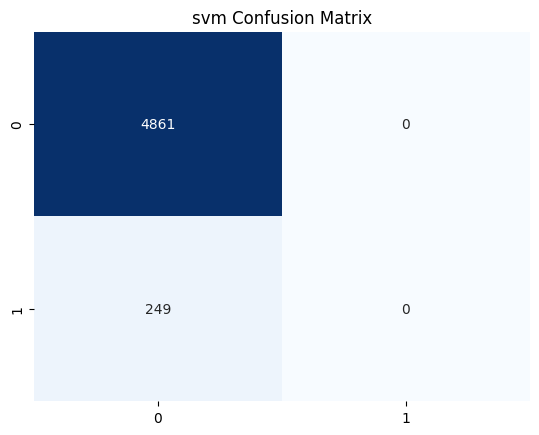

In [216]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('svm Confusion Matrix')

**KNN**

In [217]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X)
cm = confusion_matrix(y,y_pred_knn)
acc_KNN = accuracy_score(y, y_pred_knn)
print("Accuracy: ",acc_KNN)
print(classification_report(y, y_pred_knn))

Accuracy:  0.9524461839530333
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       0.69      0.04      0.08       249

    accuracy                           0.95      5110
   macro avg       0.82      0.52      0.53      5110
weighted avg       0.94      0.95      0.93      5110



Text(0.5, 1.0, 'KNN Confusion Matrix')

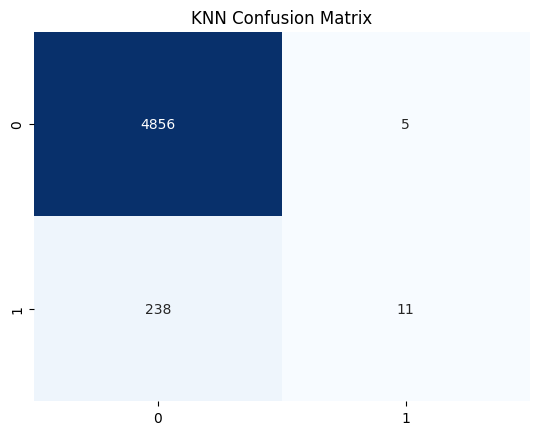

In [218]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('KNN Confusion Matrix')

**Random Forest**

In [219]:
from sklearn.ensemble import RandomForestClassifier
import itertools
rf = RandomForestClassifier(criterion='entropy',max_depth= 20, min_samples_leaf= 2, min_samples_split= 5,n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200)

In [220]:
y_pred_rf = rf.predict(X)
cm = confusion_matrix(y,y_pred_rf)

In [221]:
acc_rf=accuracy_score(y, y_pred_rf)
print("Accuracy: ",acc_rf)
print(classification_report(y, y_pred_rf))

Accuracy:  0.9573385518590998
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4861
           1       1.00      0.12      0.22       249

    accuracy                           0.96      5110
   macro avg       0.98      0.56      0.60      5110
weighted avg       0.96      0.96      0.94      5110



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

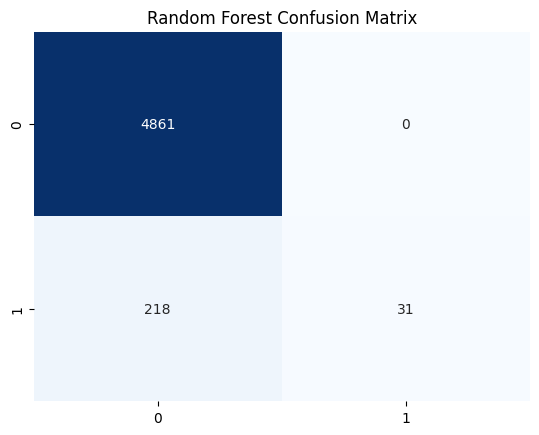

In [222]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Random Forest Confusion Matrix')

**Logistic Regression**

In [223]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [224]:
y_pred_lg=lg.predict(X)
cm = confusion_matrix(y,y_pred_rf)
acc_lg=accuracy_score(y,y_pred_lg)

In [225]:
print('Accuracy: ', acc_lg)
print(classification_report(y,y_pred_lg))

Accuracy:  0.9512720156555773
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       0.00      0.00      0.00       249

    accuracy                           0.95      5110
   macro avg       0.48      0.50      0.49      5110
weighted avg       0.90      0.95      0.93      5110



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

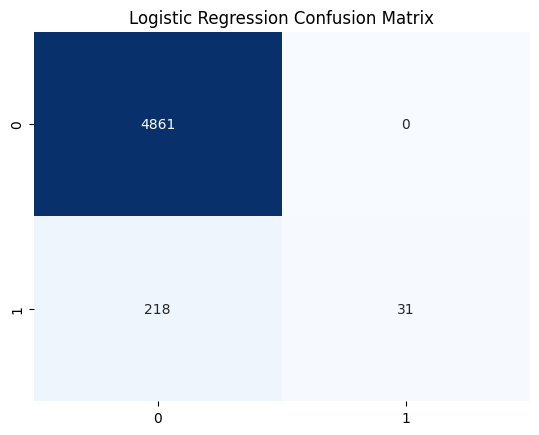

In [226]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regression Confusion Matrix')

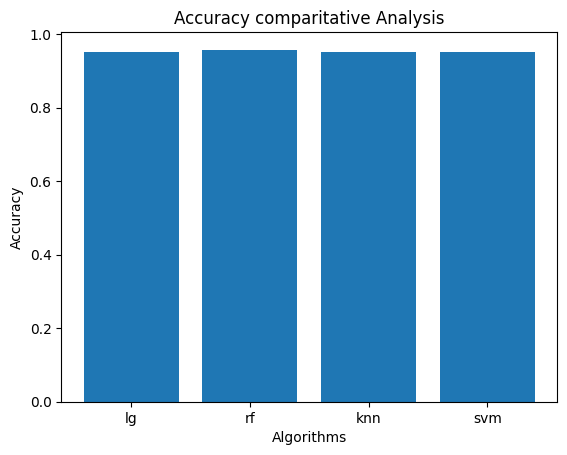

In [227]:
plt.bar(['lg','rf','knn','svm'],[acc_lg,acc_rf,acc_KNN,acc_svm])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy comparitative Analysis")
plt.show()

In [228]:
# save and write model by using pickle
import pickle
pickle.dump(rf, open('strokenew.pkl', 'wb'))